# Table of Contents --> TBU

1. [Feature engineering](#1-bullet) <br>
    I - [Number of orders](#2-bullet) <br>
    II - [Customer location](#3-bullet) <br>
    III - [Time of orders](#4-bullet) <br>
    IV - [Products informations](#5-bullet) <br>
    V - [Reviews informations](#6-bullet) <br>
    VI - [Payment informations](#7-bullet) <br>
    <br>
    
2. [Preprocessing](#8-bullet) <br>
    I - [xx](#xx-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    IV - [xx](#xx-bullet) <br>
    V - [xx](#xx-bullet) <br>
    VI - [xx](#xx-bullet) <br>
    VII - [xx](#xx-bullet) <br>
    <br>
    
3. [xx](#xx-bullet) <br>
    I - [xx](#xx-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    IV - [xx](#xx-bullet) <br>
    V - [xx](#xx-bullet) <br>
    VI - [xx](#xx-bullet) <br>
    VII - [xx](#xx-bullet) <br>
    <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import timeit

from functions import *

In [2]:
# Loading datas

customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')

full_data = pd.read_csv('cleaned_data.csv', sep=',')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_row', 50)

In [4]:
full_data.head()

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,['a9516a079e37a9c9c36b9b78b10169e8'],['7c67e1448b00f6e969d365cea6b010ab'],2017-05-22 15:22:12,1.0,124.99,21.88,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,Not applicable,Not applicable,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,['4aa6014eceb682077f9dc4bffebc05b0'],['b8bc237ba3788b23da09c0f1f3a3288c'],2018-01-18 20:58:32,1.0,289.00,46.48,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Not applicable,Not applicable,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,['bd07b66896d6f1494f5b86251848ced7'],['7c67e1448b00f6e969d365cea6b010ab'],2018-06-05 16:19:10,1.0,139.94,17.79,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,Not applicable,Not applicable,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,['a5647c44af977b148e0a3a4751a09e2e'],['7c67e1448b00f6e969d365cea6b010ab'],2018-03-27 16:31:16,1.0,149.94,23.36,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,Not applicable,Not applicable,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,['9391a573abe00141c56e38d84d7d5b3b'],['4a3ca9315b744ce9f8e9374361493884'],2018-07-31 10:10:09,1.0,230.00,22.25,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25


In [5]:
full_data.shape

(99431, 44)

# 1. Feature engineering <a class="anchor" id="1-bullet"></a>

We will create a new dataframe with one row per customer and with a selection of relevant variables

In [6]:
len(full_data['customer_unique_id'].unique())

96086

In [7]:
data = pd.DataFrame()
data['customer_unique_id'] = full_data['customer_unique_id'].unique()

In [8]:
data.shape

(96086, 1)

## I - Number of orders <a class="anchor" id="2-bullet"></a>

In [9]:
temp_df = pd.DataFrame()
temp_df['customer_unique_id'] = full_data['customer_unique_id'].value_counts().index
temp_df['nb_orders'] = full_data['customer_unique_id'].value_counts().values
temp_df

,customer_unique_id,nb_orders
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7
4,ca77025e7201e3b30c44b472ff346268,7
...,...,...
96081,5b5c96a57b90dd238dd79f6079021707,1
96082,081f07439678af2da7755a0aa572154d,1
96083,9c57789a6a587f4efcfb01e36c106014,1
96084,9e4c21635f640562de1a6976374fba03,1


In [10]:
# Adding number of orders per customer

# Create df to store the nb_orders per customer_unique_id
temp_df = pd.DataFrame()
temp_df['customer_unique_id'] = full_data['customer_unique_id'].value_counts().index
temp_df['nb_orders'] = full_data['customer_unique_id'].value_counts().values

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders
0,861eff4711a542e4b93843c6dd7febb0,1
1,290c77bc529b7ac935b93aa66c333dc3,1
2,060e732b5b29e8181a18229c7b0b2b5e,1
3,259dac757896d24d7702b9acbbff3f3c,1
4,345ecd01c38d18a9036ed96c73b8d066,1


In [11]:
data.shape

(96086, 2)

In [12]:
data[data['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_unique_id,nb_orders
14101,8d50f5eadf50201ccdcedfb9e2ac8455,17


## II - Customer location <a class="anchor" id="3-bullet"></a>

In [13]:
# Location informations : we will keep only customer_state and coordinates, city will creates too many values

var_list = ['customer_unique_id', 'customer_state', 'customer_geolocation_lat', 'customer_geolocation_lng']

# Creating df to store our variables
temp_df = pd.DataFrame()

for var in var_list:
    temp_df[var] = full_data.drop_duplicates(subset='customer_unique_id')[var]

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925


## III - Time of orders <a class="anchor" id="4-bullet"></a>

In [14]:
# Time of orders : first we get the time of the first and the last order of each customer_unique_id

# Creating df to store our variables
temp_df = pd.DataFrame()
temp_df['last_order_time'] = full_data.groupby(by='customer_unique_id')['order_purchase_timestamp'].max()
temp_df['first_order_time'] = full_data.groupby(by='customer_unique_id')['order_purchase_timestamp'].min()

# Transforming in date type
temp_df['last_order_time'] = pd.to_datetime(temp_df['last_order_time'], infer_datetime_format=True, errors='raise')
temp_df['first_order_time'] = pd.to_datetime(temp_df['first_order_time'], infer_datetime_format=True, errors='raise')

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30


In [15]:
# We will compute the mean time between orders of each customer_unique_id

mean_time_between_orders = [] # The list we will add to our df once completed

for time_list in full_data.groupby(by='customer_unique_id')['order_purchase_timestamp'].apply(list): # Getting all order times of each customer_unique_id in a list
    
    if len(time_list) == 1: # If we have only one order we can't compute a difference
        mean_time_between_orders.append(pd._libs.tslibs.timedeltas.Timedelta(0))
    
    else: # If we have 2 or more orders
        
        time_list = pd.to_datetime(time_list, infer_datetime_format=True, errors='raise').sort_values()
        
        diff_times = [] # For each customer_unique_id we will get times differences between each orders in a list

        for i, elt in enumerate(time_list):
            if i == 0: # For the first order time we can't compute a difference with previous order
                pass
            else: # For the second orders and the nexts we compute the difference with previous order
                diff_times.append(time_list[i] - time_list[i-1])

        mean_time_between_orders.append(np.mean(diff_times)) # We take the mean of times between 2 consecutives orders

len(mean_time_between_orders) # Checking we have the right lenght

96086

In [16]:
# Adding the list to our df
data['mean_time_between_orders'] = mean_time_between_orders
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days


In [17]:
data.dtypes

customer_unique_id                   object
nb_orders                             int64
customer_state                       object
customer_geolocation_lat            float64
customer_geolocation_lng            float64
last_order_time              datetime64[ns]
first_order_time             datetime64[ns]
mean_time_between_orders    timedelta64[ns]
dtype: object

## IV - Products informations <a class="anchor" id="5-bullet"></a>

In [18]:
# Creating df to store our variables
temp_df = pd.DataFrame()

# nb_items
temp_df['total_nb_items'] = full_data.groupby(by='customer_unique_id')['nb_items'].sum()
temp_df['mean_nb_items'] = full_data.groupby(by='customer_unique_id')['nb_items'].mean()

# price and freight
temp_df['mean_price'] = full_data.groupby(by='customer_unique_id')['total_price'].mean()
temp_df['mean_freight_value'] = full_data.groupby(by='customer_unique_id')['total_freight_value'].mean()

# product_category
temp_df['prefered_product_category_name'] = full_data.groupby(by='customer_unique_id')['prefered_product_category_name'].agg(pd.Series.mode)
temp_df['prefered_product_category_name'] = select_one_mode_value(temp_df, 'prefered_product_category_name')

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort


For now we won't use products characteristics (lenght, weight...), it doesn't seem useful for aclustering

## V - Reviews informations <a class="anchor" id="6-bullet"></a>

In [19]:
# First we create new variables in full_data before aggregation by customer_unique_id

# To know for a given variable if there is a review or not
def is_review(elt):
    if elt == 'Not applicable':
        return 0
    else:
        return 1

# Application of this function
full_data['is_review'] = full_data['review_id'].apply(is_review)
full_data['is_review_comment_title'] = full_data['review_comment_title'].apply(is_review)
full_data['is_review_comment_message'] = full_data['review_comment_message'].apply(is_review)

# Computing time between delivery and review
def time_diff(time_1, time_2):
    if time_1 == 'Not applicable' or time_2 == 'Not applicable': # If no review we set diff to 0
        return pd._libs.tslibs.timedeltas.Timedelta(0)
    else: # If there is a review we compute the diff
        return pd.to_datetime(time_1) - pd.to_datetime(time_2)

full_data['time_for_review'] = full_data.apply(lambda x: time_diff(x['review_answer_timestamp'], x['order_delivered_customer_date']), axis=1)

# Transforming review_score in NaN and float
def to_float(elt):
    if elt == 'Not applicable':
        return np.nan
    else:
        return float(elt)

full_data['review_score'] = full_data['review_score'].apply(to_float)

In [20]:
full_data[['review_score', 'is_review', 'is_review_comment_title', 'is_review_comment_message', 'time_for_review']]

,review_score,is_review,is_review_comment_title,is_review_comment_message,time_for_review
0,4.0,1,0,0,5 days 11:59:05
1,5.0,1,0,0,12 days 10:02:10
2,5.0,1,0,0,0 days 18:12:08
3,5.0,1,0,0,5 days 02:32:22
4,5.0,1,1,1,7 days 05:04:04
...,...,...,...,...,...
99426,4.0,1,1,0,14 days 15:08:27
99427,5.0,1,0,0,4 days 15:41:20
99428,1.0,1,1,1,-2 days +06:37:52
99429,5.0,1,0,0,3 days 03:35:39


In [21]:
# Now we can create our variables

temp_df = pd.DataFrame()

# % reviews
nb_orders = full_data.groupby(by='customer_unique_id')['customer_unique_id'].apply(len)

temp_df['%_review'] = (full_data.groupby(by='customer_unique_id')['is_review'].sum()) / nb_orders
temp_df['%_review_comment_title'] = (full_data.groupby(by='customer_unique_id')['is_review_comment_title'].sum()) / nb_orders
temp_df['%_review_comment_message'] = (full_data.groupby(by='customer_unique_id')['is_review_comment_message'].sum()) / nb_orders

# mean score
temp_df['mean_review_score'] = full_data.groupby(by='customer_unique_id')['review_score'].mean()

# mean review time
temp_df['mean_time_for_review'] = full_data.groupby(by='customer_unique_id')['time_for_review'].mean()

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04


## VI - Payment informations <a class="anchor" id="7-bullet"></a>

In [22]:
# Creating a df with our variables

temp_df = pd.DataFrame()

# prefered_payment_type
temp_df['prefered_payment_type'] = full_data.groupby(by='customer_unique_id')['prefered_payment_type'].agg(pd.Series.mode)
temp_df['prefered_payment_type'] = select_one_mode_value(temp_df, 'prefered_payment_type')

# payment 
temp_df['total_payment_value'] = full_data.groupby(by='customer_unique_id')['total_payment_value'].sum()
temp_df['mean_payment_value'] = full_data.groupby(by='customer_unique_id')['total_payment_value'].mean()

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review,prefered_payment_type,total_payment_value,mean_payment_value
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05,credit_card,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10,credit_card,335.48,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08,credit_card,157.73,157.73
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22,credit_card,173.30,173.30
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04,credit_card,252.25,252.25


In [23]:
data.shape

(96086, 21)

In [24]:
data.dtypes

customer_unique_id                         object
nb_orders                                   int64
customer_state                             object
customer_geolocation_lat                  float64
customer_geolocation_lng                  float64
last_order_time                    datetime64[ns]
first_order_time                   datetime64[ns]
mean_time_between_orders          timedelta64[ns]
total_nb_items                            float64
mean_nb_items                             float64
mean_price                                float64
mean_freight_value                        float64
prefered_product_category_name             object
%_review                                  float64
%_review_comment_title                    float64
%_review_comment_message                  float64
mean_review_score                         float64
mean_time_for_review              timedelta64[ns]
prefered_payment_type                      object
total_payment_value                       float64


In [25]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat           268
customer_geolocation_lng           268
mean_nb_items                      676
mean_price                         676
mean_freight_value                 676
prefered_product_category_name    1988
mean_review_score                  716
dtype: int64

We now have a DataFrame with one row per unique customer and synthetics informations about him and his orders

# 2. Preprocessing <a class="anchor" id="8-bullet"></a>

In [26]:
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review,prefered_payment_type,total_payment_value,mean_payment_value
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05,credit_card,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10,credit_card,335.48,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08,credit_card,157.73,157.73
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22,credit_card,173.30,173.30
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04,credit_card,252.25,252.25


In [27]:
# Creation of our matrix

X = data.iloc[:, 1:] # We withdraw customer_unique_id which is our key
del X['mean_time_between_orders']
del X['mean_time_for_review']
del X['last_order_time']
del X['first_order_time']
print(X.shape)
X.head()

(96086, 16)


,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,prefered_payment_type,total_payment_value,mean_payment_value
0,1,SP,-20.498489,-47.396929,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,credit_card,146.87,146.87
1,1,SP,-23.727992,-46.542848,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,credit_card,335.48,335.48
2,1,SP,-23.531642,-46.656289,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,credit_card,157.73,157.73
3,1,SP,-23.499702,-46.185233,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,credit_card,173.30,173.30
4,1,SP,-22.975100,-47.142925,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,credit_card,252.25,252.25


In [28]:
# Definition of preprocessing steps

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Defining numerical and categorical columns
categorical_cols = ['customer_state', 'prefered_product_category_name', 'prefered_payment_type']
numerical_cols = list(X.drop(categorical_cols, axis=1).columns)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('stdscaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 3. Modeling

## I - KMeans

In [29]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=3, random_state=0)

In [31]:
X.dtypes

nb_orders                           int64
customer_state                     object
customer_geolocation_lat          float64
customer_geolocation_lng          float64
total_nb_items                    float64
mean_nb_items                     float64
mean_price                        float64
mean_freight_value                float64
prefered_product_category_name     object
%_review                          float64
%_review_comment_title            float64
%_review_comment_message          float64
mean_review_score                 float64
prefered_payment_type              object
total_payment_value               float64
mean_payment_value                float64
dtype: object

In [32]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of data, fit model 
my_pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['nb_orders',
                                                   'customer_geolocation_lat',
                                                   'customer_geolocation_lng',
                                                   'total_nb_items',
                                                   'mean_nb_items',
                                                   'mean_price',
                                                   'mean_freight_value',
                                                   '%_review',
                   

In [33]:
my_pipeline.score(X)

-1162225.0540711877

In [34]:
# Evaluate the model
processed_X = preprocessor.fit_transform(X)
predictions = my_pipeline.predict(X)
score = metrics.silhouette_score(processed_X, predictions)
print('Silhouettes score:', score)

Silhouettes score: 0.1421517839381215


In [35]:
my_pipeline.predict(X)

array([1, 1, 1, ..., 0, 2, 0])

In [36]:
model_2 = KMeans(n_clusters=3, random_state=0)
processed_X = preprocessor.fit_transform(X)

model_2.fit(processed_X)

KMeans(n_clusters=3, random_state=0)

In [37]:
score = metrics.silhouette_score(processed_X, model_2.labels_)
print('Silhouettes score:', score)

Silhouettes score: 0.1421517839381215


In [39]:
model_2.score(processed_X)

-1162225.0540711877

In [48]:
k_clusters = range(2,16)

inertia_scores = []
silhouette_scores = []

for k in k_clusters:
    model_3 = KMeans(n_clusters=k, random_state=0)
    model_3.fit(processed_X)
    inertia_scores.append(model_3.score(processed_X))
    silhouette_scores.append(metrics.silhouette_score(processed_X, model_3.labels_))

In [51]:
for i, score in enumerate(inertia_scores):
    inertia_scores[i] = -score

[1268989.375841197,
 1162225.0540711875,
 1067880.9048084489,
 994716.663193471,
 907660.5660037022,
 835203.9218583431,
 778723.4295327115,
 722601.347305667,
 685787.9056113652,
 664129.4165753121,
 639222.1427865609,
 619299.6148799686,
 604641.7077545462,
 595000.9862363538]

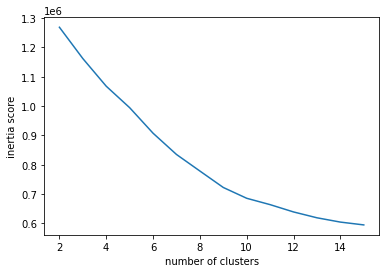

In [52]:
plt.plot(range(2,16), inertia_scores)
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.show()

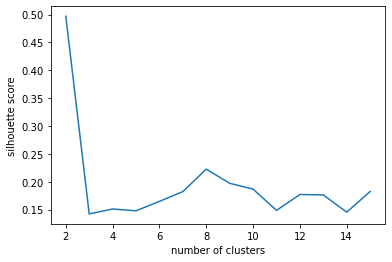

In [53]:
plt.plot(range(2,16), silhouette_scores)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

## WITH TIME

In [61]:
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review,prefered_payment_type,total_payment_value,mean_payment_value
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05,credit_card,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10,credit_card,335.48,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08,credit_card,157.73,157.73
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22,credit_card,173.30,173.30
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04,credit_card,252.25,252.25


In [62]:
# Creation of our matrix

X_bis = data.iloc[:, 1:] # We withdraw customer_unique_id which is our key
print(X_bis.shape)
X_bis.head()

(96086, 20)


,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review,prefered_payment_type,total_payment_value,mean_payment_value
0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05,credit_card,146.87,146.87
1,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10,credit_card,335.48,335.48
2,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08,credit_card,157.73,157.73
3,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22,credit_card,173.30,173.30
4,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04,credit_card,252.25,252.25


In [71]:
# Definition of preprocessing steps

# Defining numerical and categorical columns
categorical_cols = ['customer_state', 'prefered_product_category_name', 'prefered_payment_type']
time_cols = ['last_order_time', 'first_order_time', 'mean_time_between_orders', 'mean_time_for_review']
numerical_cols = list(X_bis.drop(categorical_cols, axis=1).drop(time_cols, axis=1).columns)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('stdscaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [72]:
model_bis = KMeans(n_clusters=3, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline_bis = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_bis)
                             ])

# Preprocessing of data, fit model 
my_pipeline_bis.fit(X_bis)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['nb_orders',
                                                   'customer_geolocation_lat',
                                                   'customer_geolocation_lng',
                                                   'total_nb_items',
                                                   'mean_nb_items',
                                                   'mean_price',
                                                   'mean_freight_value',
                                                   '%_review',
                   

In [68]:
preprocessor.fit_transform(X_bis)

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [65]:
my_pipeline_bis.score(X_bis)

-1162225.0540711877